In [53]:
import json
import pandas as pd

# Load JSON data
with open('/Users/andreapena/Desktop/ultimate_challenge/logins.json') as f:
    data = json.load(f)

# Check the structure
print(type(data))  

# Preview the data
df.head()

<class 'dict'>


""
timestamp
1970-01-01 20:12:16
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:36
1970-01-01 20:16:37


In [54]:
# Create a dataframe
df = pd.DataFrame(data)
df = df.rename(columns={'login_time': 'timestamp'})

# Convert to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [55]:
# Set index
df = df.set_index('timestamp').sort_index() 

In [56]:
# Resample 15 minute intervals
login_counts = df.resample('15min').size()

# Convert to DataFrame with a column name:
login_counts = login_counts.to_frame(name='logins')

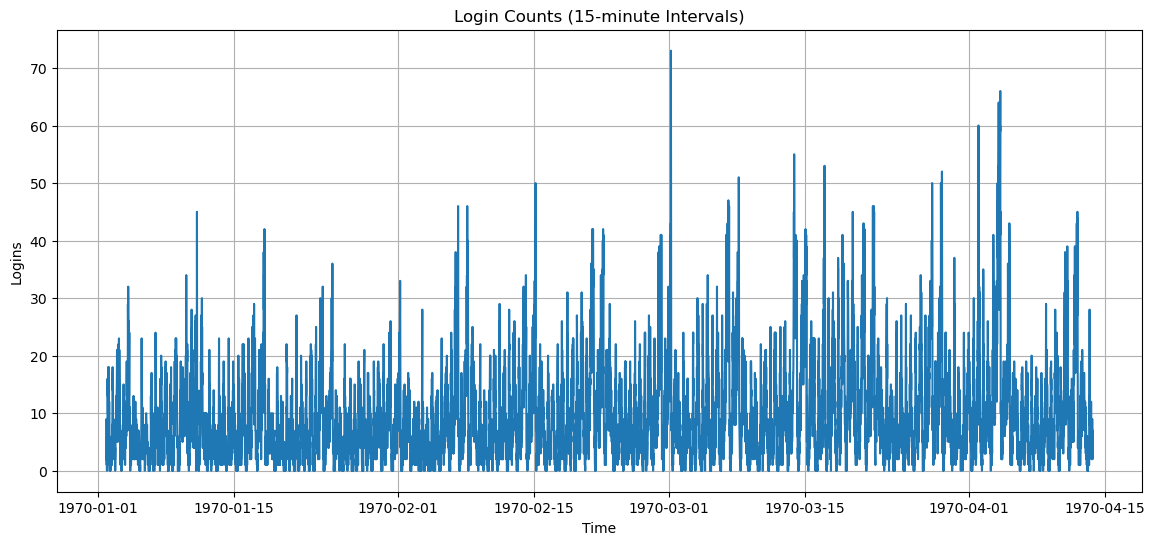

In [57]:
# Plot 
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(login_counts.index, login_counts['logins'])
plt.title('Login Counts (15-minute Intervals)')
plt.xlabel('Time')
plt.ylabel('Logins')
plt.grid(True)
plt.show()

Notes: 

This chart displays user login volume aggregated in 15-minute intervals from early January through mid-April.
There is a clear upward trend in overall usage, with several sharp spikes. These may reflect app promotions, feature launches, or recovery surges following service disruptions.

<Axes: title={'center': 'Daily Logins with 7-Day Rolling Avg'}, xlabel='timestamp'>

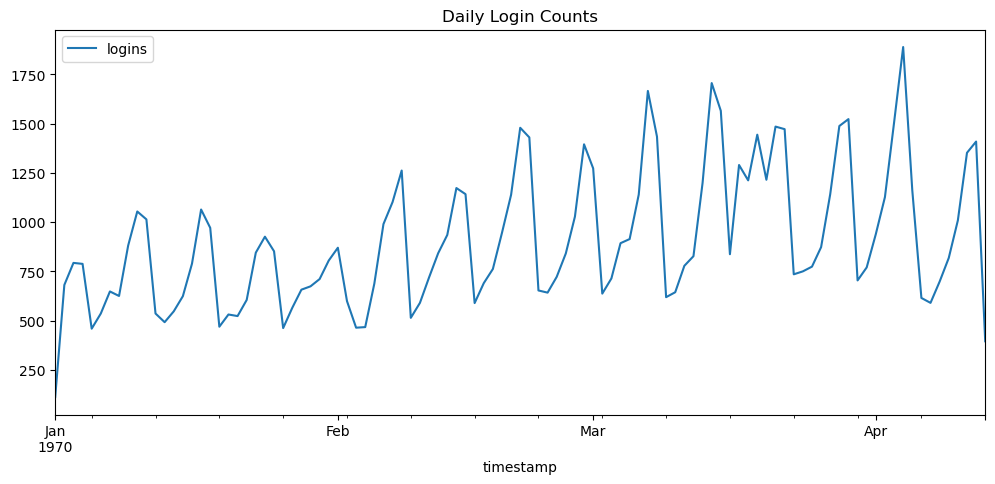

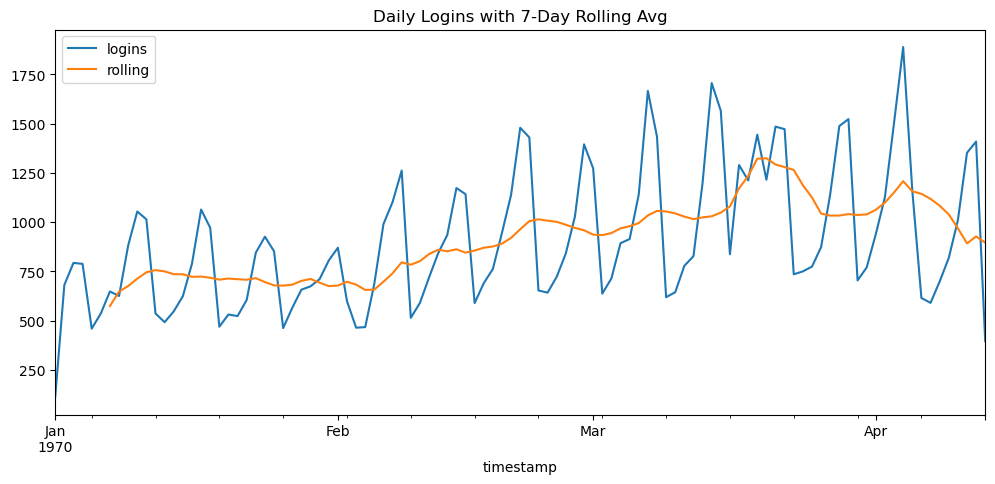

In [59]:
# Daily patterns
daily_counts = df.resample('D').size()
daily_counts = daily_counts.to_frame(name='logins')

# Plot daily logins
daily_counts.plot(figsize=(12,5), title="Daily Login Counts")

# Plot a 7-day rolling mean
daily_counts['rolling'] = daily_counts['logins'].rolling(window=7).mean()
daily_counts.plot(y=['logins', 'rolling'], figsize=(12,5), title="Daily Logins with 7-Day Rolling Avg")

Notes:

Strong weekly patterns every 7 days, possibly higher usage on the weekends. There is an increase in login from Jan. to Apr. Drops could be possibly due to outage or holidays. 

<Axes: title={'center': 'Average Logins by Hour of Day'}, xlabel='hour'>

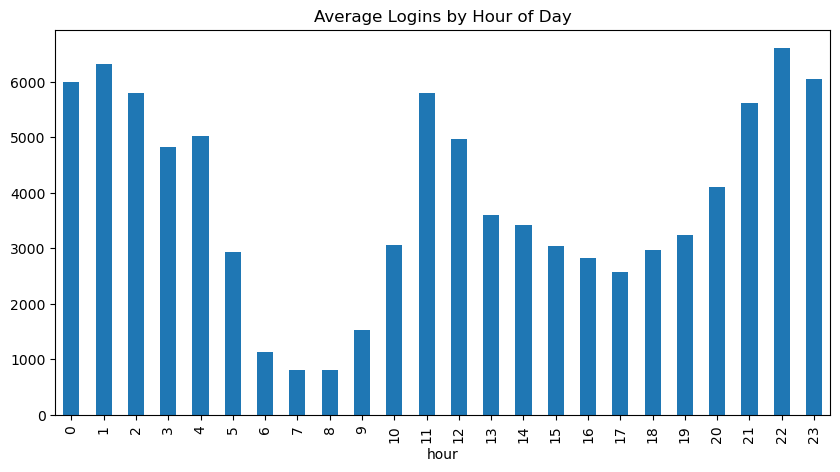

In [61]:
# Daily hourly logins
df['hour'] = df.index.hour
hourly_counts = df.groupby('hour').size()

# Plot 
hourly_counts.plot(kind='bar', figsize=(10, 5), title='Average Logins by Hour of Day')

Notes:

This bar chart shows average logins by hour of day.
Activity is lowest between 5 AM and 9 AM — consistent with typical sleep hours — and highest during late evening and early morning hours, peaking around midnight.

In [62]:
df.isnull().sum()

hour    0
dtype: int64

In [64]:
print(df.index.min(), df.index.max())

1970-01-01 20:12:16 1970-04-13 18:57:38


In [66]:
df.index.duplicated().sum()

877

Data Quality Notes:

- no missing data
- timestamp is in 1970s
- 877 duplicates, multiple logins at the same time. 

In [69]:
df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6

In [70]:
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack()

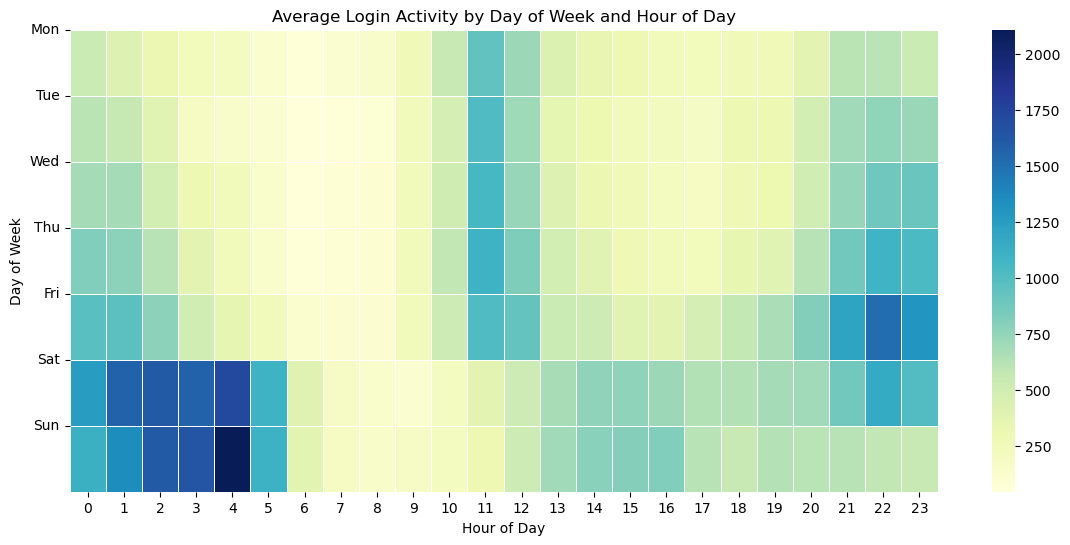

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, linewidths=0.5)

plt.title("Average Login Activity by Day of Week and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")

# Optional: Customize day labels
plt.yticks(
    ticks=[0,1,2,3,4,5,6],
    labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    rotation=0
)
plt.show()

Note:

Users exhibit strong late-night behavior on weekends, especially from 2–5 AM on Sundays.
Weekday logins are more evenly distributed, with mild evening activity.
Overall, usage aligns with leisure-based engagement, peaking during typical downtime hours and falling off during early mornings.